# Lab 04 

This lab for Week 04 was done in a Jupyter Notebook to keep all the regular expression (REGEX) content within the one space. Several of the tasks use a created txt file, while the later tasks use the file *accces.log* whicg is extracted from a ZIP file from *Splunk* available [here](https://docs.splunk.com/images/Tutorial/tutorialdata.zip).

In [276]:
import numpy as np
import pandas as pd
import re
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import shutil

## Task 1

The below text in a txt file (*quiz.txt*) can be printed with the below python regex to print every line (as line is the regex in this case).

> hello\
> Hello\
> Hello World\
> Helo John\
>       Hello mary\
> Helllllllllllo Anamaniacs\
> var = 123\
> change this #this will change\
> what [about] this.


In [277]:
# Firstly create the txt fie (quiz.txt) using a context manager and wrapping in a try/finally clause
# resource: https://stackoverflow.com/questions/8495422/use-a-context-manager-to-redirect-script-output-to-a-file

text_data = '''hello
Hello
Hello World
Helo John
       Hello mary
Helllllllllllo Anamaniacs
var = 123
change this #this will change
what [about] this.
'''

file = open('quiz.txt', "w")

try:
    file.write(text_data)
finally:
    # closing file
    file.close()

regex = '.*'
filename = 'quiz.txt'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')

# Printed content maches above 


hello
Hello
Hello World
Helo John
       Hello mary
Helllllllllllo Anamaniacs
var = 123
change this #this will change
what [about] this.


For Task one,what lines will be printed out for the following regular expressions?
- 1.a hello
- 1.b Hello
- 1.c ^Hello
- 1.d ^Hell*o
- 1.e ^Hell+o
- 1.f ^Hell?o
- 1.g. ^hello [A-Z]
- 1.h ^Hello [A-Z]
- 1.i =
- 1.j #
- 1.k [
- 1.l ^$

In [278]:
# 1.a - hello 
regex = 'hello'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# only the first line is printed as regex is case sensitive 

hello


In [279]:
# 1.b - Hello 
regex = 'Hello'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# Three lines are printed as regex is case sensitive and Hello used three times

Hello
Hello World
       Hello mary


In [280]:
# 1.c - ^Hello 
regex = '^Hello'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# Two lines are printed as regex is case sensitive only two lines start with Hello, the third has a blank space so not matched

Hello
Hello World


In [281]:
# 1.d - ^Hell*o 
regex = '^Hell*o'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# Four lines are printed 

Hello
Hello World
Helo John
Helllllllllllo Anamaniacs


In [282]:
# 1.e - ^Hell+o 
regex = '^Hell+o'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# Three lines are printed 

Hello
Hello World
Helllllllllllo Anamaniacs


In [283]:
# 1.f - ^Hell?o 
regex = '^Hell?o'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# Three lines are printed 

Hello
Hello World
Helo John


In [284]:
# 1.g - ^hello [A-Z] 
regex = '^hello [A-Z]'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# no lines are printed

In [285]:
# 1.h - ^Hello [A-Z] 
regex = '^Hello [A-Z]'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# One line is printed

Hello World


In [286]:
# 1.i - = 
regex = '='

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# One line is printed 

var = 123


In [287]:
# 1.j - #
regex = '#'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# One line is printed 

change this #this will change


In [288]:
# 1.i - [
regex = '\['

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# One line is printed. Using [ would result in an error us needed to change format

what [about] this.


In [289]:
# 1.j - ^$
regex = '^$'

with open(filename) as quizFile:
    for line in quizFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# Matched to line 10, but as it contains nothing, nothing is printed. 

## Task Two

the file *accces.log* whicg is extracted from a ZIP file from *Splunk* available [here](https://docs.splunk.com/images/Tutorial/tutorialdata.zip). As there were several *access.log* files, the one from the ww1 directory was used. Trying to unzip this file was tricky as using the suggestion [here](https://stackoverflow.com/questions/5710867/downloading-and-unzipping-a-zip-file-without-writing-to-disk) we would get a string literal, so that all of text would have a b character proceeded by all of the log file content as below (further info on these string literals was sought [here](https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal)). 

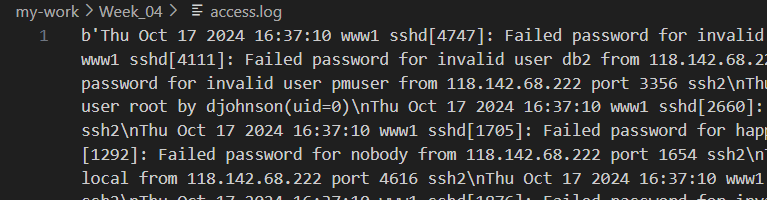

This was fixed by changing the format of log file to txt file. 


Search for 
- 2.a all of the numbers
- 2.b The first digits of the IP address at the start of each line
- 2.c The dates and times at the end of each line 
- 2.d The dates and times 
- 2.e The times 
- 2.f The variable names in the URLs
- 2.g The variable values in the URLs
- 2.h The last 2 triples of an IP address.

In [290]:
url = 'https://docs.splunk.com/images/Tutorial/tutorialdata.zip'

resp = urlopen(url)
myzip = ZipFile(BytesIO(resp.read()))
print(myzip.namelist())

access_log_file = myzip.open('www1/secure.log')
data = access_log_file.read()

with open('access.txt', 'wb') as f: 
    f.write(data)

# slicing to make a smaller access file as access.txt is over 100000 characters 
sliced_string = data[0:250]

with open('smaller_access.txt', 'w') as f: 
    f.write(slided_string)

# https://stackoverflow.com/questions/5710867/downloading-and-unzipping-a-zip-file-without-writing-to-disk

['www1/', 'www1/secure.log', 'www1/access.log', 'www3/', 'www3/secure.log', 'www3/access.log', 'vendor_sales/', 'vendor_sales/vendor_sales.log', 'www2/', 'www2/secure.log', 'www2/access.log', 'mailsv/', 'mailsv/secure.log']


In [291]:
# 2.1a - all of the numbers
filename = 'smaller_access.txt'
regex = '[0-9]'

with open(filename) as inputFile:
    for line in inputFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# all lines printed 

Thu Oct 17 2024 16:33:52 www1 sshd[4747]: Failed password for invalid user jabber from 118.142.68.222 port 3187 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[4111]: Failed password for invalid user db2 from 118.142.68.222 port 4150 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[5359]: Failed password for invalid user pmuser from 118.142.68.222 port 3356 ssh2
Thu Oct 17 2024 16:33:52 www1 su: pam_unix(su:session): session opened for user root by djohnson(uid=0)
Thu Oct 17 2024 16:33:52 www1 sshd[2660]: Failed password for invalid user irc from 118.142.68.222 port 4343 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1705]: Failed password for happy from 118.142.68.222 port 4174 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1292]: Failed password for nobody from 118.142.68.222 port 1654 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1560]: Failed password for invalid user local from 118.142.68.222 port 4616 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[59414]: Accepted password for myuan from 10.1.10.172 port 1569 ssh2
Thu Oct 

In [292]:
# 2.b The first digits of the IP address at the start of each line

regex = '^[0-9]+\.'

with open(filename) as inputFile:
    for line in inputFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# no lines as no lines start with an IP address 

In [293]:
# 2.c The dates and times at the end of each line 

regex = '$\d'

with open(filename) as inputFile:
    for line in inputFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# no lines as no lines have dates or times at end 

In [294]:
# 2.d The dates and times 

regex = '\w{3} \d{2} \d{4} \d{2}:\d{2}:\d{2}'

with open(filename) as inputFile:
    for line in inputFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# all lines 

Thu Oct 17 2024 16:33:52 www1 sshd[4747]: Failed password for invalid user jabber from 118.142.68.222 port 3187 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[4111]: Failed password for invalid user db2 from 118.142.68.222 port 4150 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[5359]: Failed password for invalid user pmuser from 118.142.68.222 port 3356 ssh2
Thu Oct 17 2024 16:33:52 www1 su: pam_unix(su:session): session opened for user root by djohnson(uid=0)
Thu Oct 17 2024 16:33:52 www1 sshd[2660]: Failed password for invalid user irc from 118.142.68.222 port 4343 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1705]: Failed password for happy from 118.142.68.222 port 4174 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1292]: Failed password for nobody from 118.142.68.222 port 1654 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1560]: Failed password for invalid user local from 118.142.68.222 port 4616 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[59414]: Accepted password for myuan from 10.1.10.172 port 1569 ssh2
Thu Oct 

In [295]:
# 2.e The times 

regex =  '[0-9]{2}:[0-9]{2}:[0-9]{2}' # or \d{2}:\d{2}:\d{2}

with open(filename) as inputFile:
    for line in inputFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# all lines 

Thu Oct 17 2024 16:33:52 www1 sshd[4747]: Failed password for invalid user jabber from 118.142.68.222 port 3187 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[4111]: Failed password for invalid user db2 from 118.142.68.222 port 4150 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[5359]: Failed password for invalid user pmuser from 118.142.68.222 port 3356 ssh2
Thu Oct 17 2024 16:33:52 www1 su: pam_unix(su:session): session opened for user root by djohnson(uid=0)
Thu Oct 17 2024 16:33:52 www1 sshd[2660]: Failed password for invalid user irc from 118.142.68.222 port 4343 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1705]: Failed password for happy from 118.142.68.222 port 4174 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1292]: Failed password for nobody from 118.142.68.222 port 1654 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1560]: Failed password for invalid user local from 118.142.68.222 port 4616 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[59414]: Accepted password for myuan from 10.1.10.172 port 1569 ssh2
Thu Oct 

In [296]:
# 2.f The variable names in the urls

regex =  '\w+='

with open(filename) as inputFile:
    for line in inputFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# Only two

Thu Oct 17 2024 16:33:52 www1 su: pam_unix(su:session): session opened for user root by djohnson(uid=0)
Thu Oct 17 2024 16:33:52 www1 sshd[3118]: pam_unix(sshd:session): session opened for user djohnson by (uid=0)


In [297]:
# 2.g The variable values in the urls

regex =  '=\w+'

with open(filename) as inputFile:
    for line in inputFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# Only two

Thu Oct 17 2024 16:33:52 www1 su: pam_unix(su:session): session opened for user root by djohnson(uid=0)
Thu Oct 17 2024 16:33:52 www1 sshd[3118]: pam_unix(sshd:session): session opened for user djohnson by (uid=0)


In [298]:
# 2.h The last 2 triples of an IP address.

regex =  '\d{1,3}\.\d{1,3}[^\.]'

with open(filename) as inputFile:
    for line in inputFile:
        searchresult = re.search(regex, line)
        if (searchresult):
            matchingLine = line
            print(matchingLine, end='')
# All, but the last as that line got cut off when it was slided

Thu Oct 17 2024 16:33:52 www1 sshd[4747]: Failed password for invalid user jabber from 118.142.68.222 port 3187 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[4111]: Failed password for invalid user db2 from 118.142.68.222 port 4150 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[5359]: Failed password for invalid user pmuser from 118.142.68.222 port 3356 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[2660]: Failed password for invalid user irc from 118.142.68.222 port 4343 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1705]: Failed password for happy from 118.142.68.222 port 4174 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1292]: Failed password for nobody from 118.142.68.222 port 1654 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1560]: Failed password for invalid user local from 118.142.68.222 port 4616 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[59414]: Accepted password for myuan from 10.1.10.172 port 1569 ssh2
Thu Oct 17 2024 16:33:52 www1 sshd[1876]: Failed password for invalid user db2 from 118.142.68.222 port 1151 ssh

## Task Three 

Use the below python code to try out regular expressions to see what python returns

>regex =  '\[.*\]'
>with open(filename) as inputFile:
>>     for line in inputFile:
>>>          found_text_list = re.findall(regex, line)
>>>>          if (len(found_text_list) != 0):
>>>>>              found_text = found_text_list[0]
>>>>>              print(found_text)



In [299]:
regex =  '\[.*\]'

with open(filename) as inputFile:
    for line in inputFile:
        found_text_list = re.findall(regex, line)
        if (len(found_text_list) != 0):
            found_text = found_text_list[0]
            print(found_text)
        else:
            print("Regex not found")

# This was updated to add an else statement to print when the regex was not found 

[4747]
[4111]
[5359]
Regex not found
[2660]
[1705]
[1292]
[1560]
[59414]
[1876]
[3310]
[2149]
[2766]
[3118]
[2598]
[4637]
[1335]
[4153]
[3149]
[4620]
[1260]
[6069]
[3919]


## Task Four 

Write some code that will anonymise the sub domains of IP addresses by X-ing out the last two triplets, with the new lines stored in another file.

In [300]:
# making a copy of smaller_access.txt so that the IP address can be edited
shutil.copy('smaller_access.txt', 'smaller_access_copy.txt')

regex = '(\d{1,3}\.\d{1,3}\.)\d{1,3}\.\d{1,3}'
replacement = '\\1XXX.XXX '

filename = 'smaller_access_copy.txt'
output_filename = 'anonymised_IP_addresses.txt'

with open(filename) as inputFile:
    with open(output_filename, 'w') as outputFile:
        for line in inputFile:
            newline = re.sub(regex, replacement, line)
            outputFile.write(newline)
            print(newline)

Thu Oct 17 2024 16:33:52 www1 sshd[4747]: Failed password for invalid user jabber from 118.142.XXX.XXX  port 3187 ssh2

Thu Oct 17 2024 16:33:52 www1 sshd[4111]: Failed password for invalid user db2 from 118.142.XXX.XXX  port 4150 ssh2

Thu Oct 17 2024 16:33:52 www1 sshd[5359]: Failed password for invalid user pmuser from 118.142.XXX.XXX  port 3356 ssh2

Thu Oct 17 2024 16:33:52 www1 su: pam_unix(su:session): session opened for user root by djohnson(uid=0)

Thu Oct 17 2024 16:33:52 www1 sshd[2660]: Failed password for invalid user irc from 118.142.XXX.XXX  port 4343 ssh2

Thu Oct 17 2024 16:33:52 www1 sshd[1705]: Failed password for happy from 118.142.XXX.XXX  port 4174 ssh2

Thu Oct 17 2024 16:33:52 www1 sshd[1292]: Failed password for nobody from 118.142.XXX.XXX  port 1654 ssh2

Thu Oct 17 2024 16:33:52 www1 sshd[1560]: Failed password for invalid user local from 118.142.XXX.XXX  port 4616 ssh2

Thu Oct 17 2024 16:33:52 www1 sshd[59414]: Accepted password for myuan from 10.1.XXX.XXX 